**Note** https://docs.python.org/3/tutorial/classes.html -> make the classes part of this recommended reading at some point. 

## Session 4 - Object Oriented Programming and Machine Learning Modules

Now that we know what classes are and what data structures are, let's apply that!

For this session, I am going to split it into two parts. First, we are going to do a brief recap of object oriented programming (OOP) and an example of how classes are useful in programming. We will also discuss why OOP is useful for machine learning projects. Then, we are going to apply what we learned about object oriented programming to make two models with scikit-learn. 

One of the main types of projects that would be done in Python rather than R are projects involving machine learning and deep learning models. Python's object oriented nature lends itself well to these kinds of projects. 

If we recall from session 1, a class is _ and an instance of a class is _. Classes can have attributes which consist of data atributes (instance variables (unique to each instance) and class variables (shared by all instances of the class)) and methods (functions belonging to an object, shared by all instances of the class).  While R does allow for the creation of classes, we tend to write more functions than classes in R. Python uses a more object-oriented style than R, and it is more convenient in python to create a class with assoiated methods (aka functions that modify the state of the class instance), because derived classes can inherit methods from base classes. 'Python classes provide all the standard features of Object Oriented Programming: the class inheritance mechanism allows multiple base classes, a derived class can override any methods of its base class or classes, and a method can call the method of a base class with the same name. Objects can contain arbitrary amounts and kinds of data. As is true for modules, classes partake of the dynamic nature of Python: they are created at runtime, and can be modified further after creation.' Additionally, most built-in operators with special syntax (aka arithmetic operators) can be redefined for class instances. 

Inheritence is when new classes are created based off of base classes, allowing the new classes to inherit methods from the base classes. Understanding the base class an object has can help you understand what methods it will have as well. However, derived classes may override methods of their base classes. There are also classes called Mixins, which are similar to base classes in that they can be used to add functionality to a new class (https://scikit-learn.org/stable/api/sklearn.base.html), but mixin classes are not useful on their own. Mixins allow for reusable functionality without enforcing a rigid structure like a base class. If you are going to be creating models in pytorch or tensor flow, understanding base classes and mixins is very helpful. 

If you want to check the type of an instance, you can use `isinstance(obj, type)` to check if obj is of type 'type' or of some class derived from 'type'. 

Finally, please note that classes can have their own iterators, which allow us to loop over the class instance in some way. 


## Projects
Most of the time, you will likely be doing things in python that there is not a lot of support for in R -> think machine learning/AI. 
Packages for these things require an understanding of object oriented programming (classes, class instances, methods, attributes.) For example, most packages come equiped with functions/methods you will need to use while using the packages. 

In addition to the object oriented programming, we will demonstrate how to make some useful plots and display tables in python similarly to how we would do it in R and maybe how to make a report?? idk haven't decided yet. 

I want to walk through a project and spend a bit of time on each thing you'd do + compare it to R. 

Some examples being: sci-kit learn, pytorch, tensorflow. 


## Part 1: Why object oriented programming matters in ML

Because classes can inherit from other classes (and other reasons), it makes sense for python to use classes. This is especially important in the context of creating models becausae when we want to make a model or classifier in python we are making an instance of a class. For example, if we wanted to make a logistic regression model in python we would make an instance of the LogisticRegression() class from sci-kit learn. Once we make an instance of a class, that instance has access to all methods associated with the class it came from. For example, it has methods like 'fit' that fit the model to a dataset and 'predict' that uses the model to predict the outcome based on the supplied values of predictor variables. 

Object oriented programming is important in ML because:
* ML libraries like scikit-learn, pytorch and tensorflow are built around objects (models and datastructures are objects)
* Because the models are instances of classes, they are self-contained with their parameters and methods. They can also inherit from a base model class, making it easier to customize models and understand what methods a model will have. You can also write your own derivative model classes using one of the pre-built model classes as a base class. 
* Finally, because models are often built off of a base model class, they will have methods by the same expected name that work across different models (ex: `.fit()`, `.predict()`, `.transform()`)

When we want to make an instance of a class, we 'call' or instantiate the class object, creating an instance of the class object. 
`x = MyClass()` creates an instance `x` of the class `MyClass()`. 



## Quick class example:

### Base Classes
Just to show off classes and how to make them, we are going to do a quick example of defining a simple dog class, derivative class that inherits from it, and a mixin. 

In [ ]:
class Dog:
    def __init__(self, name, breed): ## sets up the initialization for an instance of class Dog. Allows us to assign name and breed when we instantiate dog. 
        self.name = name
        self.breed = breed

    def bark(self):
        return f"{self.name} says Woof!"

my_dog = Dog("Fido", "Labrador") ## create a dog of name 'Fido' and breed 'Labrador'
print(my_dog.bark())  # Output: Fido says Woof!

## if we want to see what kind of dog our dog is
print(f"Our dog {my_dog.name} is a {my_dog.breed}.")

Fido says Woof!
Our dog Fido is a Labrador


### Derivative Classes
Now that we have the ability to make a dog, let's define a new class that is based on `Dog` called `GuardDog`. This class will inherit the methods from dog and can have additional methods as well. 

In [ ]:
class GuardDog(Dog):  # GuardDog inherits from Dog
    def __init__(self, name, breed, training_level): ## in addition to name and breed, we can define a training level. 
        # Call the parent (Dog) class's __init__ method
        super().__init__(name, breed)
        self.training_level = training_level  # New attribute for GuardDog that stores the training level for the dog

    def guard(self): ## checks if the training level is > 5 and if not says train more
        if self.training_level > 5:
            return f"{self.name} is guarding the house!"
        else:
            return f"{self.name} needs more training before guarding."
    
    def train(self): ## modifies the training_level attribute to increase the dog's training level
        self.training_level = self.training_level + 1
        return f"Training {self.name}. {self.name}'s training level is now {self.training_level}"

# Creating an instance of GuardDog
my_guard_dog = GuardDog("Rex", "German Shepherd", training_level= 5)

# Using methods from the base class
print(my_guard_dog.bark())  # Inherited from Dog -> Output: "Rex says Woof!"

# Using a method from the derived class
print(f"{my_guard_dog.name}'s training level is {my_guard_dog.training_level}.")
print(my_guard_dog.guard()) 

## if we want to train Rex and increase his training level, 
print(my_guard_dog.train())

## now check if he can guard 
print(my_guard_dog.guard()) 

Rex says Woof!
Rex needs more training before guarding.
Training Rex.
Rex is guarding the house!


As we saw with Rex, derivative classes can inherit methods (like `.bark()`) from parent classes. They can also have new methods.

Additionally, methods associated with a class can access attributes (like accessing `self.name`) or even modify them (like in `.train(self)`).

### Mixins
Finally, we are going to define a mixin class that adds a functionality to the base `Dog()` class which allows us to teach a dog tricks. 

In [ ]:
class TrickMixin: ## mixin that will let us teach a dog tricks
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)  # Ensures proper initialization in multiple inheritance
        self.tricks = []  # Store learned tricks

    def learn_trick(self, trick):
        """Teaches the dog a new trick."""
        if trick not in self.tricks:
            self.tricks.append(trick)
            return f"{self.name} learned a new trick: {trick}!"
        return f"{self.name} already knows {trick}!"

    def perform_tricks(self):
        """Returns a list of tricks the dog knows."""
        if self.tricks:
            return f"{self.name} can perform: {', '.join(self.tricks)}."
        return f"{self.name} hasn't learned any tricks yet."

## note: the TrickMixin class is not a standalone class! it does not let us create a dog on its own!!!


Using this Trick mixin, we can then create a new class of dog (SmartDog) using both `Dog`and `TrickMixin` as base classes. 

In [ ]:
class SmartDog(Dog, TrickMixin):
    def __init__(self, name, breed):
        super().__init__(name, breed)  # Initialize Dog class
        TrickMixin.__init__(self)  # Initialize TrickMixin separately

# Creating a SmartDog that can learn tricks
my_smart_dog = SmartDog("Buddy", "Border Collie")

# a SmartDog object can use methods from both parent object `Dog` and mixin `TrickMixin`.
print(my_smart_dog.bark())  # "Buddy says Woof!"
print(my_smart_dog.learn_trick("Sit"))  # "Buddy learned a new trick: Sit!"
print(my_smart_dog.learn_trick("Roll Over"))  # "Buddy learned a new trick: Roll Over!"
print(my_smart_dog.learn_trick("Sit"))  # "Buddy already knows Sit!"
print(my_smart_dog.perform_tricks())  # "Buddy can perform: Sit, Roll Over."


While our dog example was very simple, this is the same way that model classes work in machine learning modules (packages). 

## Project Introduction

In this project, we want to see how well we can classify penguins into breeds based on their "bill_length_mm", "bill_depth_mm", and "flipper_length_mm". To do this, we are going to use scikit-learn to make both an unsupervised learning model (k-means) that classifies the penguins into clusters based on their measurements to see how well the cluster identity represents breed, and a supervised learning model (k-NN) that basically stores instances of the training data and classifies penguins based on their similarity to the penguins in the training data. 

For both of these models, we will be using instances of model classes from the scikit-learn module to see how 

## List of the common methods that we would expect to see in all of these packages
- things like .fit, .predict, .scale, .train test split (if it's included in multiple packages)

Now that you understand more about object oriented programming and how to work with data, let's walk through a project that shows how to use some of these packages. I am showing you how to use sci-kit learn instead of pytorch or tensorflow because it is a bit simpler but there are many resources out there for the other two packages. 

I am also including a homework demo for pytorch in case you want to do it just as an example!

In this scenario, we want to see if clustering by bill length/depth and flipper length yields clusters according to species. We also want to see how well we can classify penguins. This is similar to some projects you might do with python. We are going to use the penguins dataset from the seaborn package. 


# Step 1: Import packages

Our first step is always to import the packages/modules we need. 

In this case, we need:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine as p9
from tabulate import tabulate

## instead of importing the whole sklearn package, we are going to import specific functions and classes that we will use.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, adjusted_rand_score



In [2]:
# Load the Penguins dataset
penguins = sns.load_dataset("penguins").dropna()

# Make a summary table for the penguins dataset, grouping by species. -> include a description of the .agg functions/keywords to show why this table would work
summary_table = penguins.groupby("species").agg({
    "bill_length_mm": ["mean", "std", "min", "max"],
    "bill_depth_mm": ["mean", "std", "min", "max"],
    "flipper_length_mm": ["mean", "std", "min", "max"],
    "body_mass_g": ["mean", "std", "min", "max"],
    "sex": lambda x: x.value_counts().to_dict()  # Count of males and females -> can include a dictionary in a table...
})

# gt_table = GT(summary_table).tab_header("Penguins Summary Table by Species")
# gt_table.show()

print(tabulate(summary_table, headers = 'keys', tablefmt = 'github'))

| species   |   ('bill_length_mm', 'mean') |   ('bill_length_mm', 'std') |   ('bill_length_mm', 'min') |   ('bill_length_mm', 'max') |   ('bill_depth_mm', 'mean') |   ('bill_depth_mm', 'std') |   ('bill_depth_mm', 'min') |   ('bill_depth_mm', 'max') |   ('flipper_length_mm', 'mean') |   ('flipper_length_mm', 'std') |   ('flipper_length_mm', 'min') |   ('flipper_length_mm', 'max') |   ('body_mass_g', 'mean') |   ('body_mass_g', 'std') |   ('body_mass_g', 'min') |   ('body_mass_g', 'max') | ('sex', '<lambda>')        |
|-----------|------------------------------|-----------------------------|-----------------------------|-----------------------------|-----------------------------|----------------------------|----------------------------|----------------------------|---------------------------------|--------------------------------|--------------------------------|--------------------------------|---------------------------|--------------------------|--------------------------|-----------

2. Framing the Question

Goal:
We want to determine if the natural clusters of penguins, based on bill length, bill depth, flipper length, and body mass, are a good predictor of species.

To do this, we will:
    1. Cluster the dataset using k-Means (https://scikit-learn.org/stable/modules/clustering.html#k-means) and see if clusters match species labels.
    2. Classify species using k-NN (https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification) and evaluate its predictive accuracy.
    3. Compare both approaches and discuss their effectiveness.



Part 1: Clustering using K-means

In this case we want to cluster the dataset using the features listed and see if the resulting clusters correspond to the species labels. Because we are just clustering the dataset and not doing any prediction, we do not need to split the data into a training and test set. However, we do need to scale the features to allow for comparison and not over-weight any particular feature. 



In [3]:
## Data Preparation
# Selecting features for clustering
X = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
y = penguins["species"]

# Standardizing the features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
## Perform K-means clustering 
# Applying k-Means clustering with 3 clusters (since we have 3 species)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) ## make an instance of the K means class and perform clustering. 

## the fit
penguins["kmeans_cluster"] = kmeans.fit_predict(X_scaled)

C:\Users\vaithid1\AppData\Local\anaconda3\envs\python-intro-env\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.


In [5]:
# Convert species names to numbers for comparison
penguins['species_label'] = y.astype("category").cat.codes

# Make a table showing the species and the assigned numeric code
summary_table = pd.DataFrame({
    "Species": y,
    "Category Code": penguins['species_label']
}).drop_duplicates().sort_values("Category Code")

print(summary_table)


# Calculate clustering performance using Adjusted Rand Index (ARI) -> maybe change this or describe what it means. 
kmeans_ari = adjusted_rand_score(penguins['species_label'], penguins["kmeans_cluster"])
print(f"k-Means Adjusted Rand Index: {kmeans_ari:.2f}")

       Species  Category Code
0       Adelie              0
152  Chinstrap              1
220     Gentoo              2
k-Means Adjusted Rand Index: 0.80


In [6]:
## make a comparison table
# Create a comparison table
comparison_table = penguins.groupby(["species", "kmeans_cluster"]).size().unstack(fill_value=0)
comparison_table = comparison_table.reset_index(level="species")


table = (
    GT(comparison_table)
    .tab_header("Species vs KMeans Cluster Comparison")
)

table.show()

## maybe put some proportions to make this nicer...

C:\Users\vaithid1\AppData\Local\anaconda3\envs\python-intro-env\lib\site-packages\great_tables\_tbl_data.py:797: UserWarning: pandas DataFrame contains non-string column names. Coercing to strings. Here are the first few non-string columns:

  * Position 1: 0
  * Position 2: 1
  * Position 3: 2


<!DOCTYPE html>
 
 
 
 
 
 

 
 

 
 Species vs KMeans Cluster Comparison 
 
 
 species 
 0 
 1 
 2 
 
 
 
 
 Adelie 
 124 
 0 
 22 
 
 
 Chinstrap 
 5 
 0 
 63 
 
 
 Gentoo 
 0 
 119 
 0

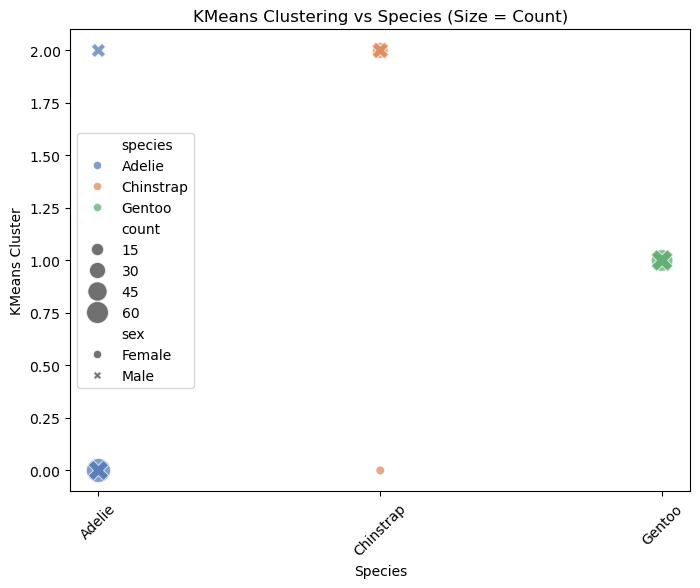

In [7]:
## if we want to make a plot to visualize the clusters, we can do this with seaborn scatterplot

# Count occurrences of each species-cluster-sex combination
scatter_data = penguins.groupby(["species", "kmeans_cluster", "sex"]).size().reset_index(name="count")

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=scatter_data,
    x="species",
    y="kmeans_cluster",
    hue="species",  # Color by species
    style="sex",  # Shape by sex
    size="count",  # Point size based on count
    sizes=(40, 300),  # Control min/max point size
    palette="deep",
    alpha=0.7
)

plt.xticks(rotation=45)
plt.xlabel("Species")
plt.ylabel("KMeans Cluster")
plt.title("KMeans Clustering vs Species (Size = Count)")
plt.show()

## Step 2 -> KNN classification

For our KNN classification, we are doing a prediction and therefore we need to split into a training and test set. Our classifier object has built in methods for fitting models and predicting.

In [8]:
## perform knn classification
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Applying k-NN classification with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [9]:
## eval knn performance
# Calculate accuracy and print classification report
knn_accuracy = accuracy_score(y_test, y_pred)
print(f"k-NN Accuracy: {knn_accuracy:.2f}")
print(classification_report(y_test, y_pred))

k-NN Accuracy: 1.00
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



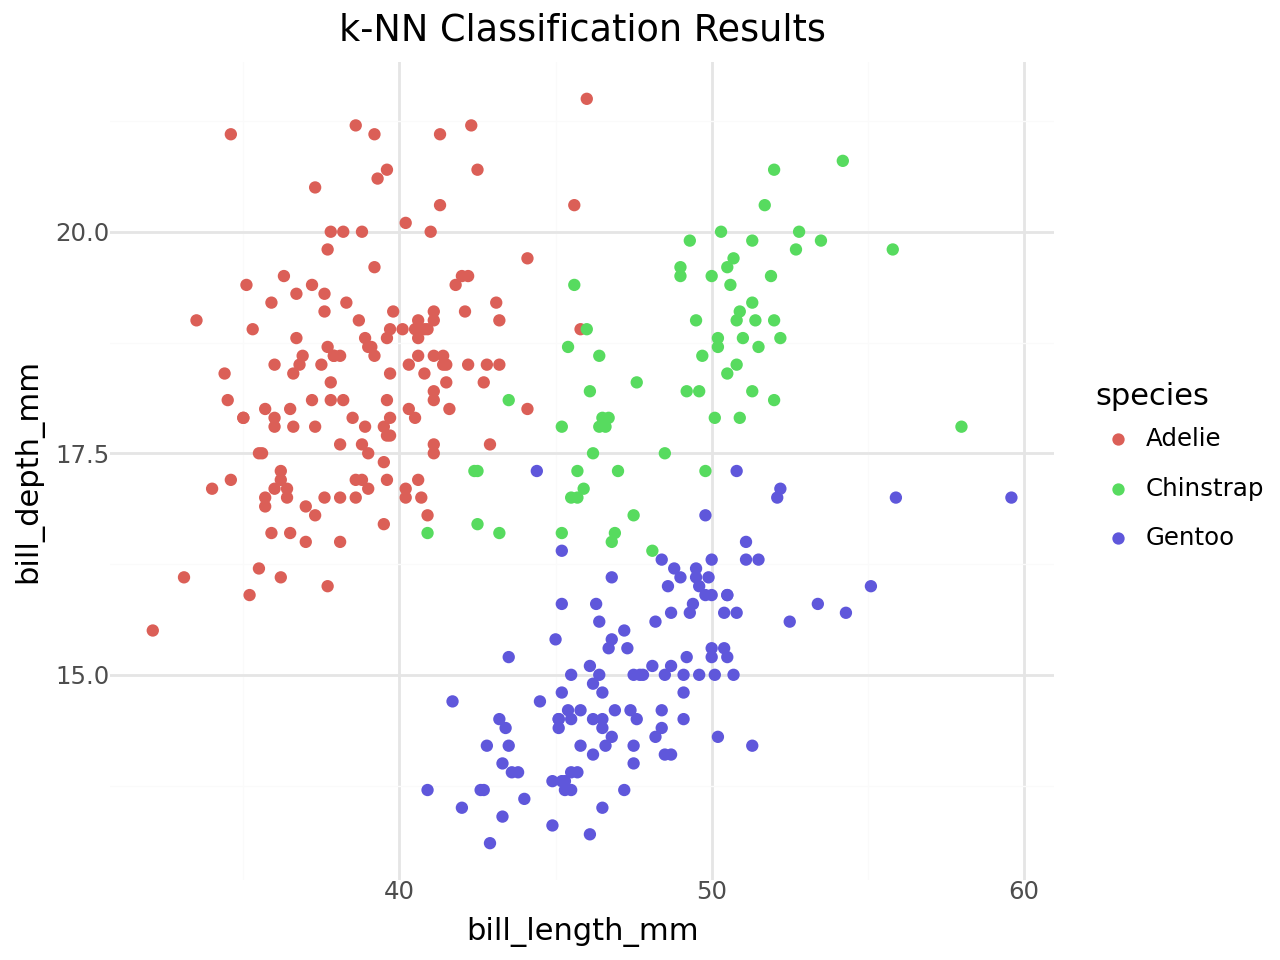

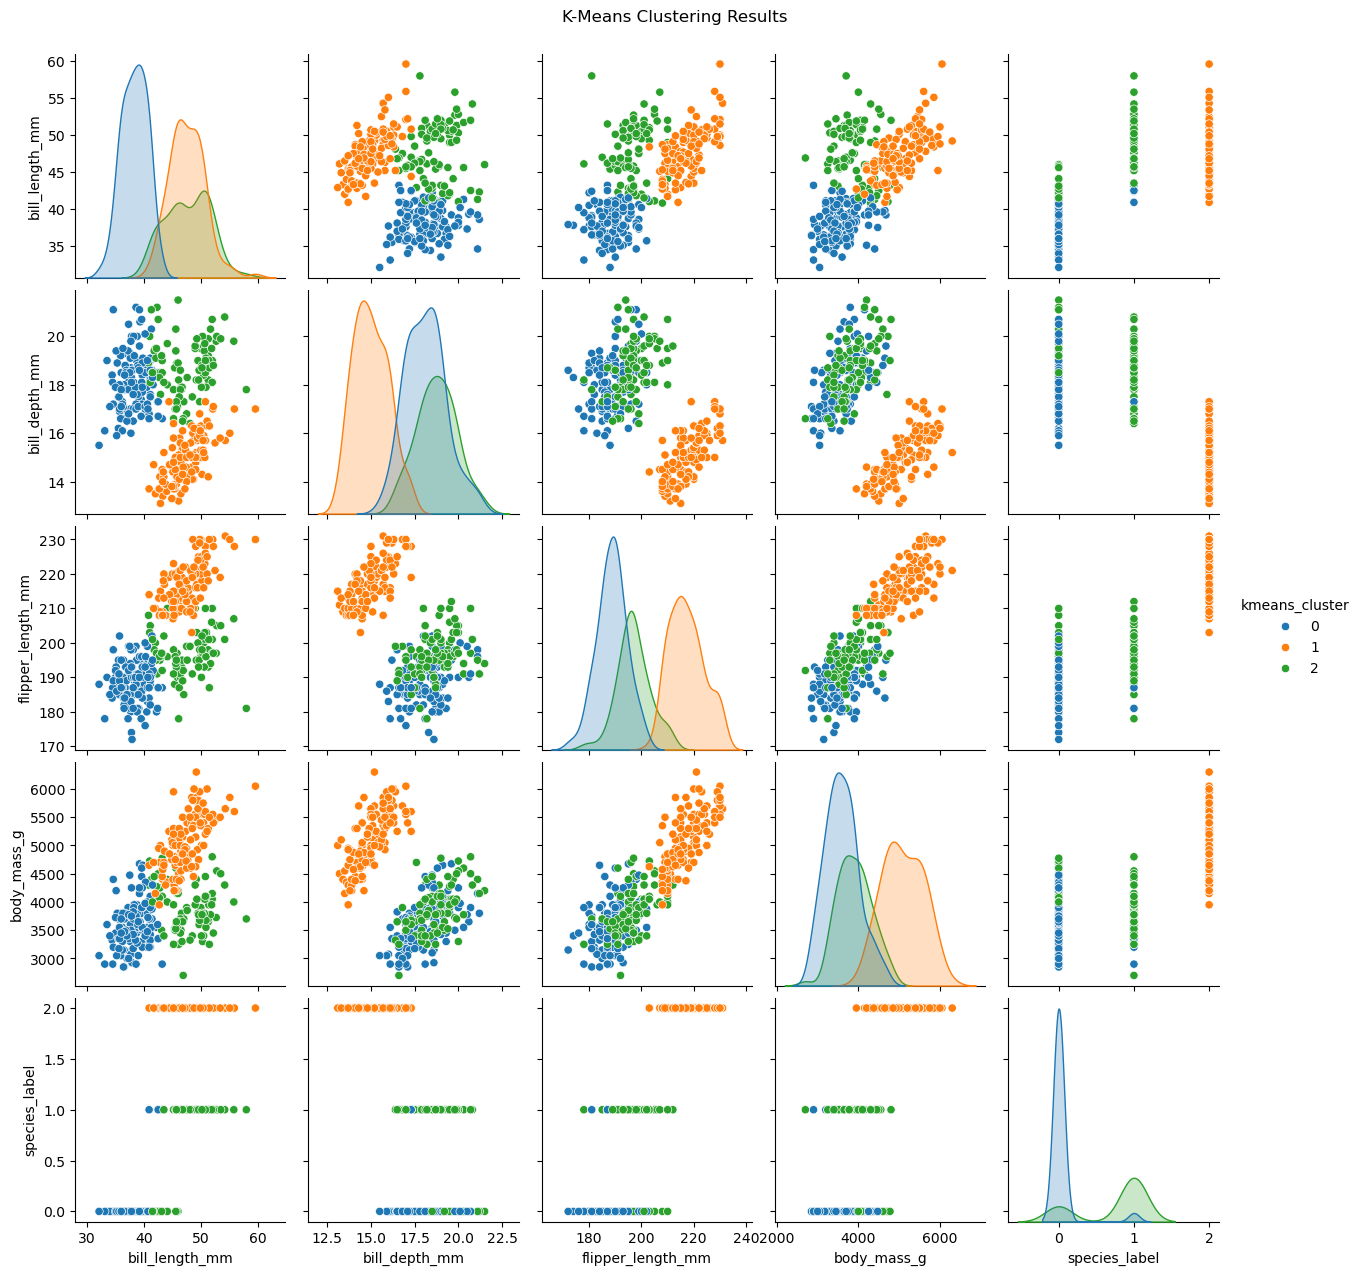

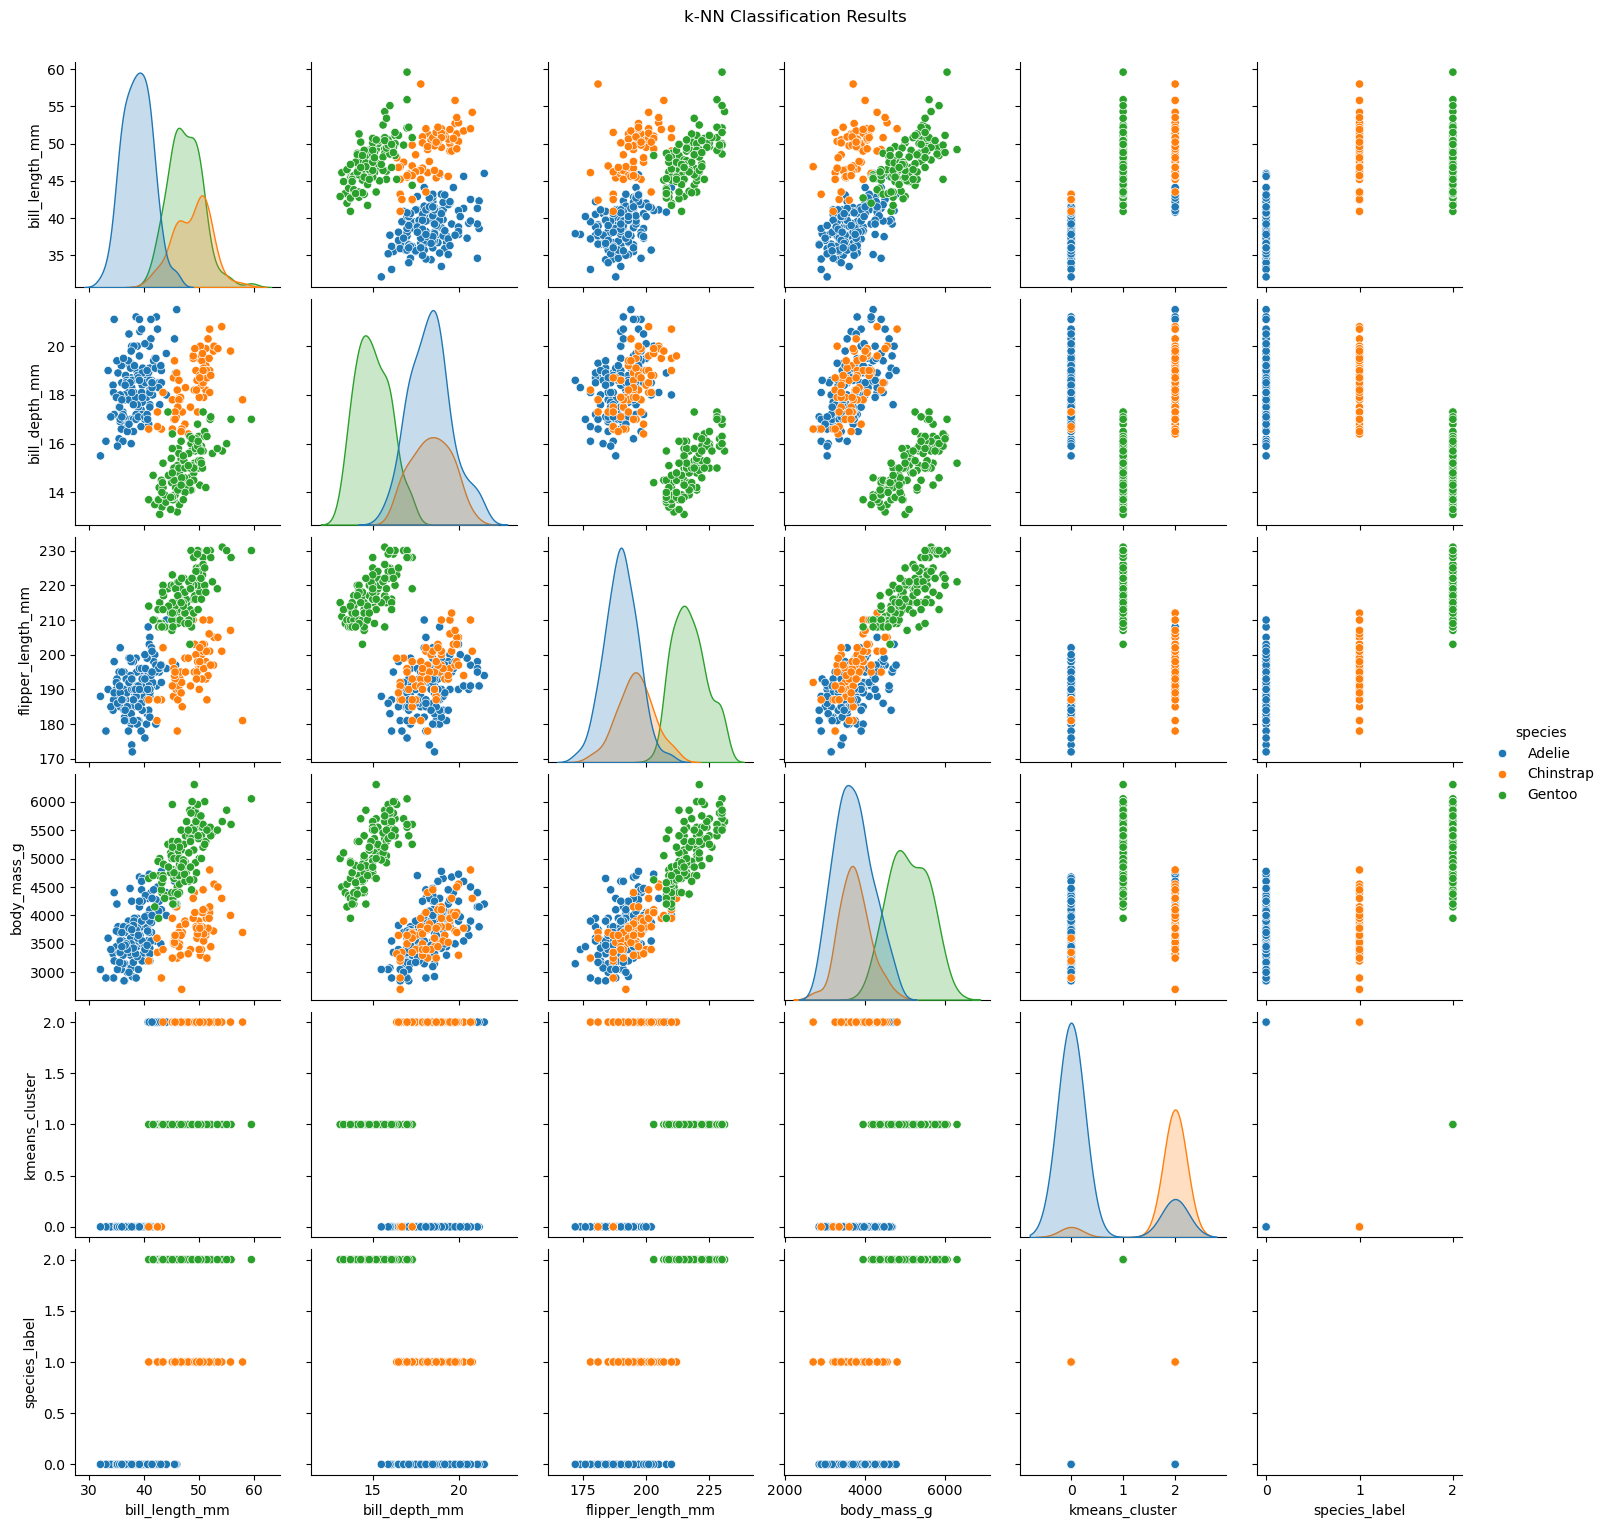

In [10]:
# Seaborn pairplot of clustering results
sns.pairplot(penguins, hue="kmeans_cluster", palette="tab10")
plt.suptitle("K-Means Clustering Results", y=1.02)

# Plotnine scatterplot of k-Means clusters
(p9.ggplot(penguins, p9.aes(x="bill_length_mm", y="bill_depth_mm", color="factor(kmeans_cluster)"))
 + p9.geom_point()
 + p9.ggtitle("K-Means Clustering Results")
 + p9.theme_minimal())

# Seaborn pairplot of k-NN classification results
sns.pairplot(penguins, hue="species", palette="tab10")
plt.suptitle("k-NN Classification Results", y=1.02)

# Plotnine scatterplot for k-NN classification
(p9.ggplot(penguins, p9.aes(x="bill_length_mm", y="bill_depth_mm", color="species"))
 + p9.geom_point()
 + p9.ggtitle("k-NN Classification Results")
 + p9.theme_minimal())

In [11]:
##  making a summary table
# Creating a summary table
summary_table = pd.DataFrame({
    "Metric": ["k-Means Adjusted Rand Index", "k-NN Accuracy"],
    "Value": [kmeans_ari, knn_accuracy]
})
print(summary_table)

                        Metric     Value
0  k-Means Adjusted Rand Index  0.799421
1                k-NN Accuracy  1.000000
